In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('/content/Bank_Stock_Price.csv')

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500
...,...,...,...,...,...,...,...
2478,2024-01-24,9600.0,9600.0,9475.0,9525.0,9525.000000,84906000
2479,2024-01-25,9450.0,9575.0,9450.0,9500.0,9500.000000,63212700
2480,2024-01-26,9400.0,9450.0,9300.0,9350.0,9350.000000,78977300
2481,2024-01-29,9400.0,9550.0,9375.0,9550.0,9550.000000,73452800


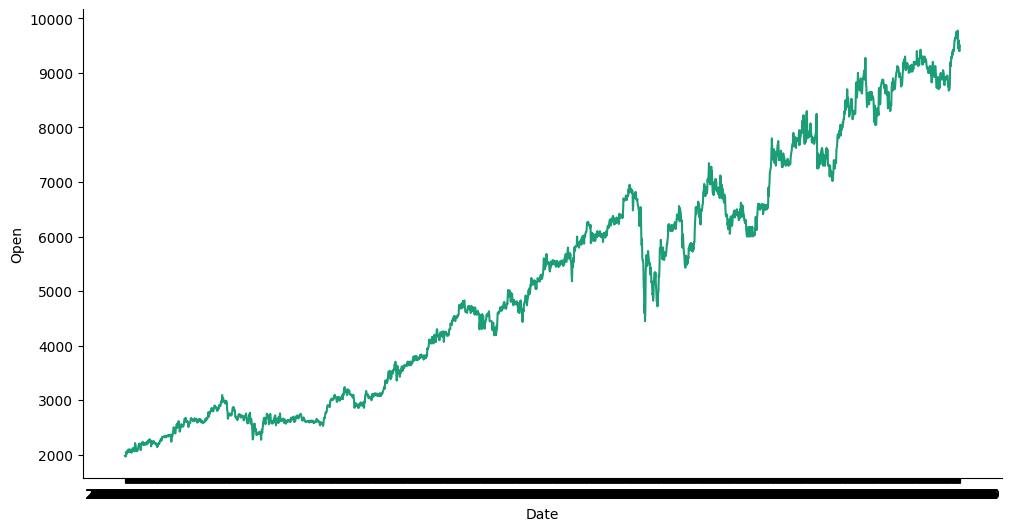

In [9]:
# @title Date vs Open

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2483 non-null   object 
 1   Open       2483 non-null   float64
 2   High       2483 non-null   float64
 3   Low        2483 non-null   float64
 4   Close      2483 non-null   float64
 5   Adj Close  2483 non-null   float64
 6   Volume     2483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.9+ KB


In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500


In [8]:
data.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [13]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

#  PCA object
pca_obj = PCA()

# Fit and transform the dataset
pca_data = pca_obj.fit_transform(X)

In [16]:

from scipy.linalg import eigh
# Covariance matrix computation
cov_matrix = np.cov(X.T)

#eigen vectors and values
eig_vals, eig_vecs = eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Transformation of the original dataset
transformed_data = np.dot(X, eig_vecs)

# Compute the explained variance ratio
explained_variance_ratio = eig_vals / np.sum(eig_vals)


In [27]:
transformed_data

array([[ 3.23677256e+00,  4.65613502e-02,  1.04875915e-02,
        -9.94536818e-03,  5.19316466e-03],
       [ 3.24599675e+00,  5.41281267e-02,  7.53553128e-03,
        -8.70698072e-03, -3.99672199e-03],
       [ 3.22951503e+00,  5.52512178e-02,  8.43056048e-03,
        -3.18938607e-03, -2.39965551e-03],
       ...,
       [-4.22064540e+00,  7.75326283e-02,  2.31835575e-02,
        -2.47446152e-02,  1.44013017e-03],
       [-4.33532672e+00,  1.30706598e-01, -2.23224128e-02,
         4.44362129e-03, -6.10699912e-03],
       [-4.43544598e+00,  1.29827068e-01, -2.21034515e-02,
         4.95115997e-03, -6.05545647e-03]])

In [26]:
explained_variance_ratio

array([9.99391731e-01, 4.10683793e-04, 9.97588332e-05, 7.77753923e-05,
       2.00508568e-05])

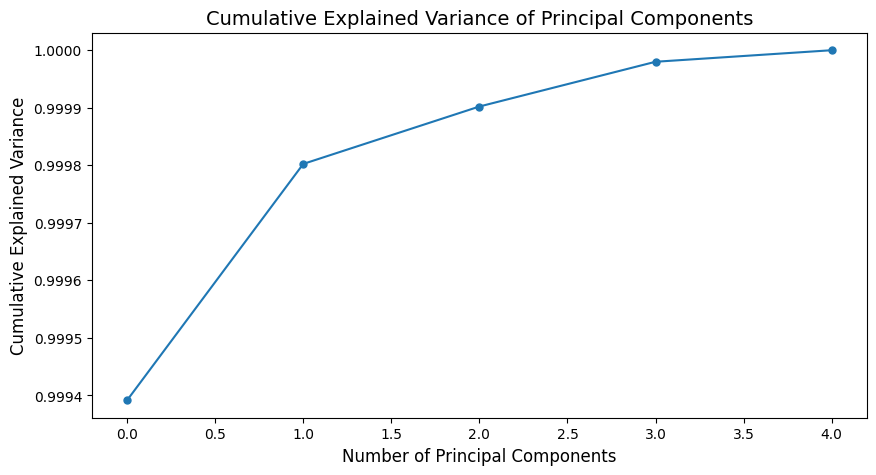

In [23]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_explained_variance, marker='o', markersize=5)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance of Principal Components', fontsize=14)
plt.show()

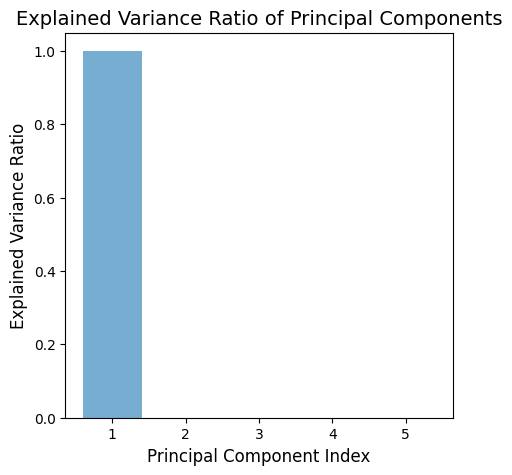

In [21]:
plt.figure(figsize=(5, 5))
plt.bar(range(len(eig_vals)), explained_variance_ratio, alpha=0.6)
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio of Principal Components', fontsize=14)
plt.xticks(range(len(eig_vals)), np.arange(1, len(eig_vals) + 1))
plt.show()

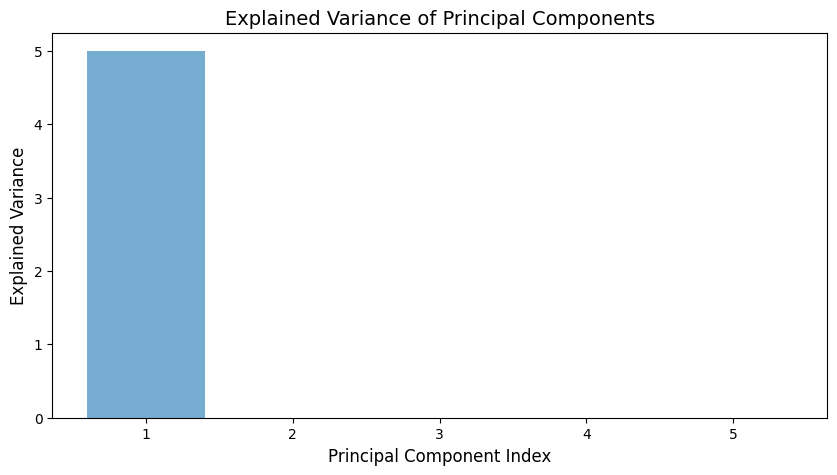

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(eig_vals)), eig_vals, alpha=0.6)
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Explained Variance of Principal Components', fontsize=14)
plt.xticks(range(len(eig_vals)), np.arange(1, len(eig_vals) + 1))
plt.show()

In [24]:
pca_obj.fit(X)
pca_data = pca_obj.transform(X)
cov_matrix_pca = np.cov(pca_data, rowvar=False, bias=True)

In [25]:

cov_matrix_pca

array([[ 4.99695866e+00,  4.23521244e-16,  6.00226898e-16,
         1.91192656e-15,  4.83347197e-16],
       [ 4.23521244e-16,  2.05341897e-03, -7.71298718e-19,
        -1.21563385e-18, -1.77454596e-19],
       [ 6.00226898e-16, -7.71298718e-19,  4.98794166e-04,
        -2.79456057e-21,  5.30966509e-20],
       [ 1.91192656e-15, -1.21563385e-18, -2.79456057e-21,
         3.88876961e-04, -8.52340975e-20],
       [ 4.83347197e-16, -1.77454596e-19,  5.30966509e-20,
        -8.52340975e-20,  1.00254284e-04]])